# Cardinality maps or voxets as a local measure of uncertainty
For an ensemble of 2D or 3D voxets here, of discrete property fields, cardinality is computed for each voxel of the domain as the number of different occuring values. By definition, cardinality is limited to categorical property fields. To compute cardinality over an ensemble of continuous property fields, one possibility is to discretize the continuous voxets into a limited number of classes ; another possibility is to compute a similar measure that characterize the spread of values at each given pixel, such as the range (maximum value minus minimum value) or the standard deviation for instance.

In [1]:
# import modules
import numpy as np
from datetime import datetime
import pickle
from uncertaintyIndicators import cardinality, plot_cardinality

picklefilenamecardinality = "./pickledata/testing-model-subset-cardinality.pickle"
picklefilenamedata = "./pickledata/testing-model-subset.pickle"
sample_num1 = 9
sample_num2 = 2
myseed = 65432

# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)


## Categorical variables
Cardinality can only be computed on categorical variables so it is applied only to the ensemble lithology voxets, the only truely discrete property field in the considered examples.

In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CARDINALITY START ")
crd=cardinality(mod_all)   
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CARDINALITY END")


13-Jul-2021 (16:26:15) - COMPUTING CARDINALITY START 
13-Jul-2021 (16:26:26) - COMPUTING CARDINALITY END


## Continuous variables
One possibility could be to discretize the continuous field in *n* bins.
Here we prefer to look at the range (max-min) of the continuous variable, at its standard deviation or at a combination of both.

In [3]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD START")
# range
rho_min = np.amin(rho_all,3)
rho_max = np.amax(rho_all,3)
rho_rng = rho_max-rho_min
sus_min = np.amin(sus_all,3)
sus_max = np.amax(sus_all,3)
sus_rng = sus_max-sus_min
grv_min = np.amin(grv_all,2)
grv_max = np.amax(grv_all,2)
grv_rng = grv_max-grv_min
mag_min = np.amin(mag_all,2)
mag_max = np.amax(mag_all,2)
mag_rng = mag_max-mag_min
# standard deviation
rho_std = np.std(rho_all,3)
sus_std = np.std(sus_all,3)
grv_std = np.std(grv_all,2)
mag_std = np.std(mag_all,2)
# mixte indicator composed of normalized maps or voxets
mag_rngstd = (mag_std/np.amax(mag_std) + mag_rng/np.amax(mag_rng))/2
grv_rngstd = (grv_std/np.amax(grv_std) + grv_rng/np.amax(grv_rng))/2
rho_rngstd = (rho_std/np.amax(rho_std) + rho_rng/np.amax(rho_rng))/2
sus_rngstd = (sus_std/np.amax(sus_std) + sus_rng/np.amax(sus_rng))/2
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD END")


13-Jul-2021 (16:26:26) - COMPUTING RANGE & STD START
13-Jul-2021 (16:26:30) - COMPUTING RANGE & STD END


## Plot
Here in these 3 successive plots, we display the cardinality for the ensemble of lithology voxets with:  
 1. the range (maximum minus minimum) over the ensemble of continuous voxets
 2. the standard deviation over the ensemble of continuous voxets
 3. an equally weighted measure of normalized range and standard deviation over the ensemble of continuous voxets
 

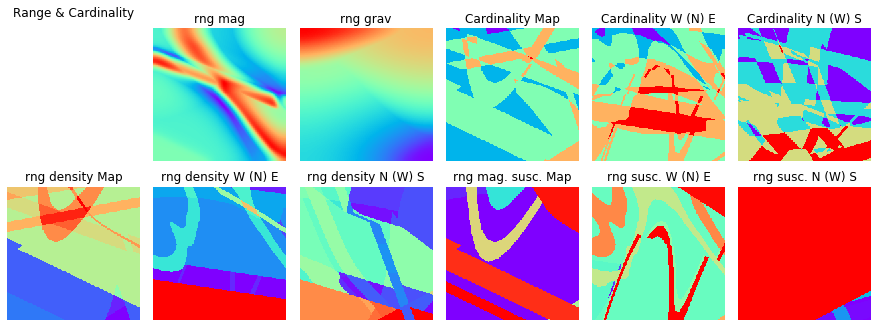

In [4]:
# Range and Cardinality 
plot_cardinality(mag_rng,grv_rng,crd,rho_rng,sus_rng,'Range','rng','Cardinality')

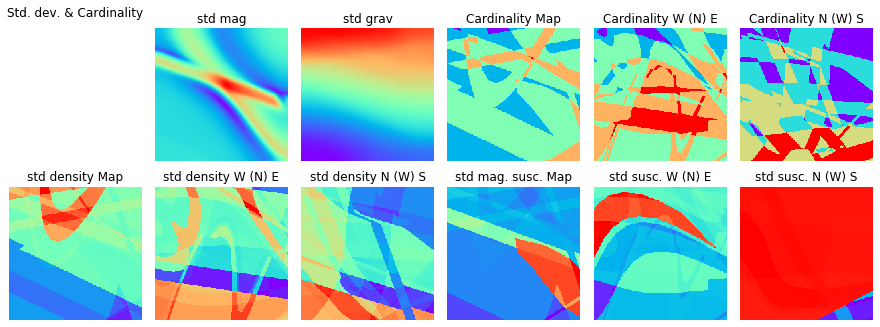

In [5]:
# Standard deviation and Cardinality
plot_cardinality(mag_std,grv_std,crd,rho_std,sus_std,'Std. dev.','std','Cardinality')

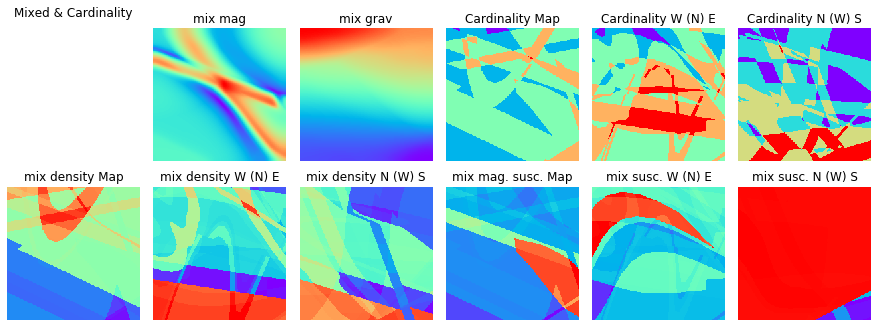

In [6]:
# Mixed indicator and Cardinality
plot_cardinality(mag_rngstd,grv_rngstd,crd,rho_rngstd,sus_rngstd,'Mixed','mix','Cardinality')

# Save computed indicators

In [7]:
with open(picklefilenamecardinality, 'wb') as f:
    pickle.dump([grv_rngstd,mag_rngstd,grv_rng,mag_rng,grv_std,mag_std,crd,rho_rngstd,sus_rngstd,rho_rng,sus_rng,rho_std,sus_std], f)
